## Import

In [1]:
# Quantum
import pennylane as qml

# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, random_split

# Numpy, Pandas
import numpy as np
import pandas as pd

# Data processing
from sklearn.preprocessing import MinMaxScaler

# Numpy
import numpy as np

# Plot
import matplotlib.pyplot as plt

# User-Defined Classes
from data_prepare import data_prepare
from trainer import trainer
from NQE_class import RNNQE

%matplotlib inline


## Load Data

In [2]:
dp = data_prepare()
train_loader, test_loader = dp.train_test_dataloader(for_nqe=True)

/Users/jhan/Desktop/Ajou Univ/NonCurriculum/2024-winter/QuantumBreak/Study/0122_RNN_NQE/NQE/data_prepare.py:86: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:281.)
  nqe_feature_tensor = torch.tensor(nqe_feature_list, dtype=torch.float32)


## Define Loss

In [4]:
def criterion(pred, label):
    '''
        pred : inner product of two states
        label : label data
    '''
    # print('pred : ', pred.shape)
    # print('label :', label.shape)
    # print('lbl[:, 0][-1] :', label[:, 0][-1])
    # print('2nd term :', (label[:, 0] * label[:, 1] + 1).shape)
    # loss = torch.sum((pred - label[:]) ** 2) / len(pred)
    loss = torch.sum(((pred) - 0.5 * (label[:, 0] * label[:, 1] + 1)) ** 2 ) / len(pred)
    return loss

def accuarcy(pred, label):
    '''
        pred : inner product of two states
        label : label data
    '''
    acc = torch.sum((torch.round(pred) == torch.round(0.5 * (label[:, 0] * label[:, 1] + 1)))) / len(pred)
    return acc

## Layer 2

In [ ]:
nqe2 = RNNQE(n_feature=5, num_layers=2)
nqe_trainer2 = trainer(nqe2, train_loader, test_loader, criterion=criterion)
nqe_trainer2.train(1000, chk=True)

In [ ]:
print('train loss :', nqe_trainer2.train_loss_list[-1])
print('test loss :', nqe_trainer2.test_loss_list[-1])

train loss : tensor(0.1219, dtype=torch.float64, grad_fn=<DivBackward0>)
test loss : tensor(0.1805, dtype=torch.float64, grad_fn=<DivBackward0>)


## Layer 1

In [ ]:
nqe1 = RNNQE(n_feature=5, num_layers=1)
nqe_trainer1 = trainer(nqe1, train_loader, test_loader, criterion=criterion)
nqe_trainer1.train(1000, chk=True)

batch_size : 64


100%|██████████| 1000/1000 [04:27<00:00,  3.74it/s]


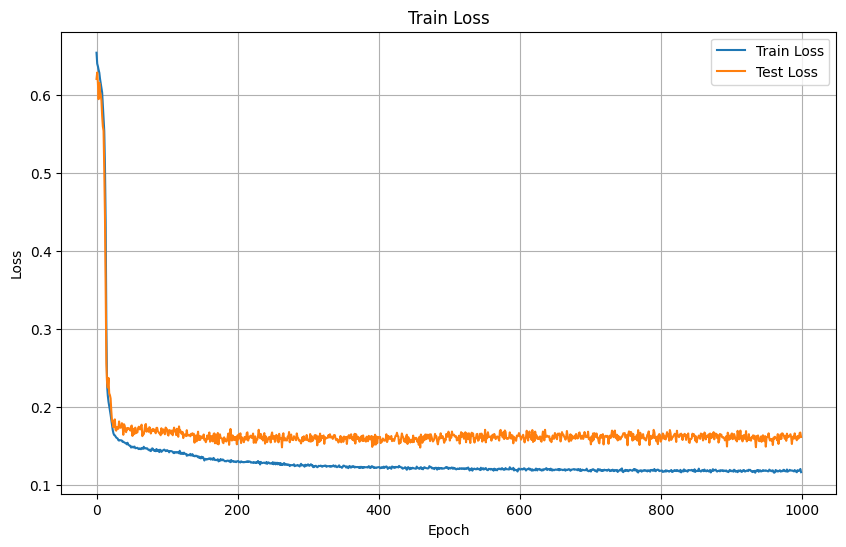

In [8]:
torch.save(nqe1, "../models/0304_RNNQE_layer1_loss0_2.pt")

## Layer 3

In [4]:
nqe3 = RNNQE(n_feature=5, num_layers=3)

In [5]:
nqe_trainer3 = trainer(nqe3, train_loader, test_loader, criterion=criterion)

batch_size : 64


100%|██████████| 1000/1000 [05:11<00:00,  3.21it/s]


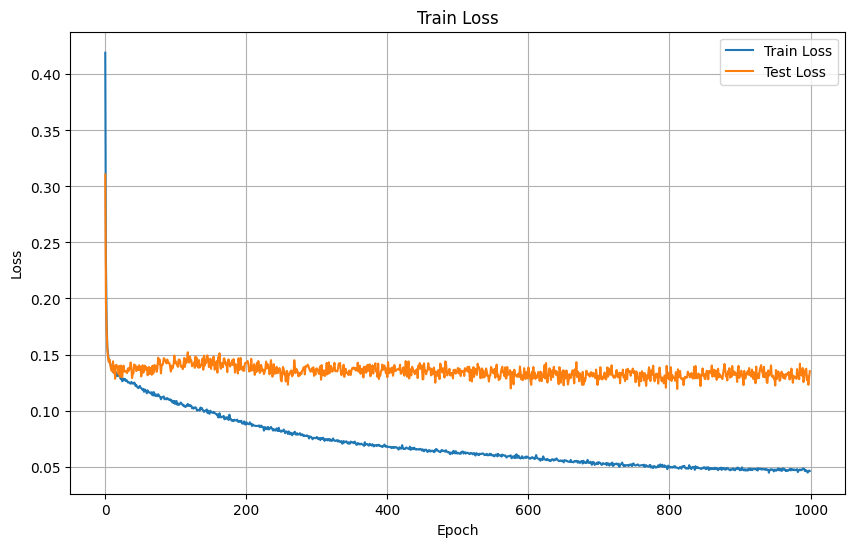

In [6]:
nqe_trainer3.train(1000, chk=True)

In [ ]:
torch.save(nqe3, "../models/0304_RNNQE_layer3_loss0_15.pt")

## Layer 4

In [4]:
nqe4 = RNNQE(n_feature=5, num_layers=4)

In [5]:
nqe_trainer4 = trainer(nqe4, train_loader, test_loader, criterion=criterion)

batch_size : 64


100%|██████████| 1000/1000 [05:39<00:00,  2.94it/s]


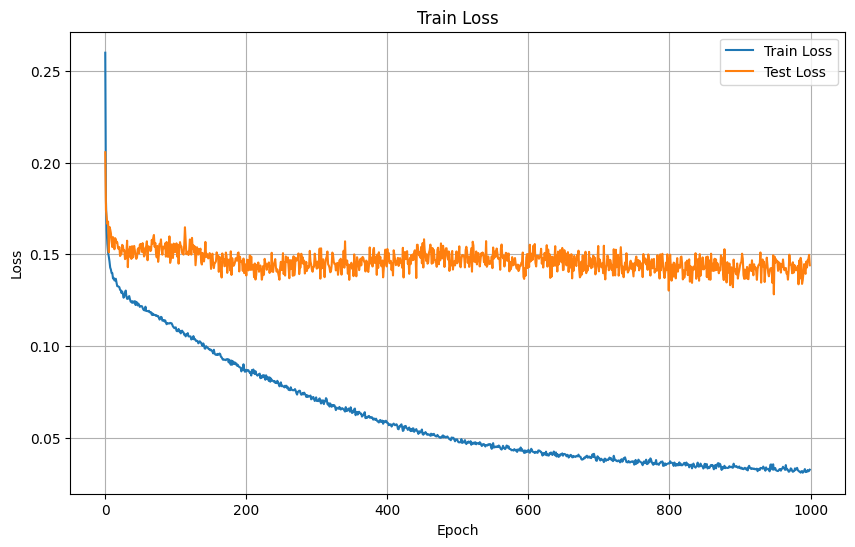

In [6]:
nqe_trainer4.train(1000, chk=True)

In [7]:
torch.save(nqe4, "../models/0304_RNNQE_layer4_loss0_15.pt")

## Layer 5

batch_size : 64


100%|██████████| 1000/1000 [05:55<00:00,  2.81it/s]


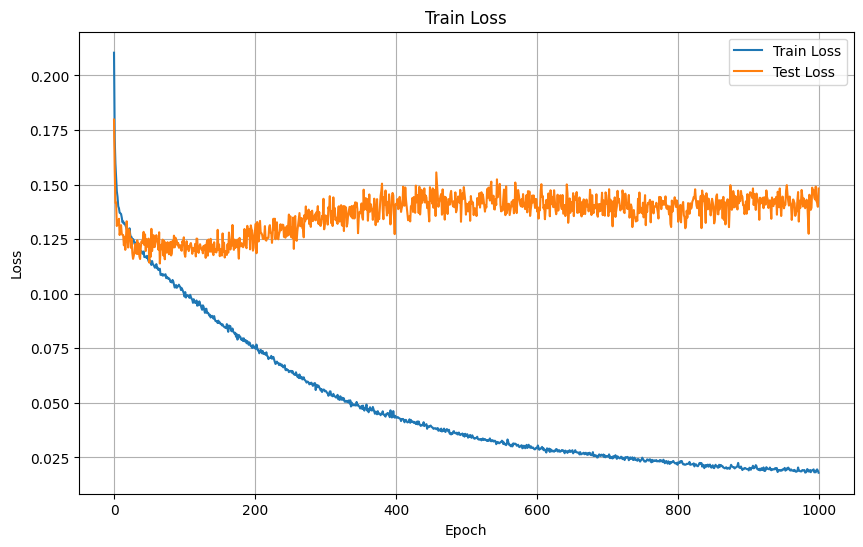

In [5]:
nqe5 = RNNQE(n_feature=5, num_layers=5)
nqe_trainer5 = trainer(nqe5, train_loader, test_loader, criterion=criterion)
nqe_trainer5.train(1000, chk=True)

In [7]:
torch.save(nqe5, "../models/0304_RNNQE_layer5_loss0_15.pt")

## Layer 6

batch_size : 64


100%|██████████| 1000/1000 [06:05<00:00,  2.74it/s]


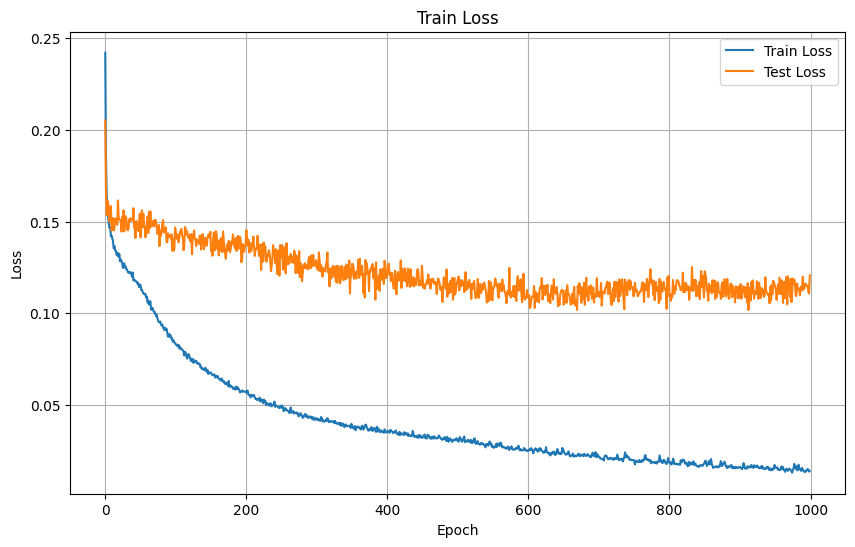

In [5]:
nqe6 = RNNQE(n_feature=5, num_layers=6)
nqe_trainer6 = trainer(nqe6, train_loader, test_loader, criterion=criterion)
nqe_trainer6.train(1000, chk=True)

In [6]:
torch.save(nqe6, "../models/0304_RNNQE_layer6_loss0_13.pt")

## Layer 7

batch_size : 64


100%|██████████| 1000/1000 [07:27<00:00,  2.24it/s]


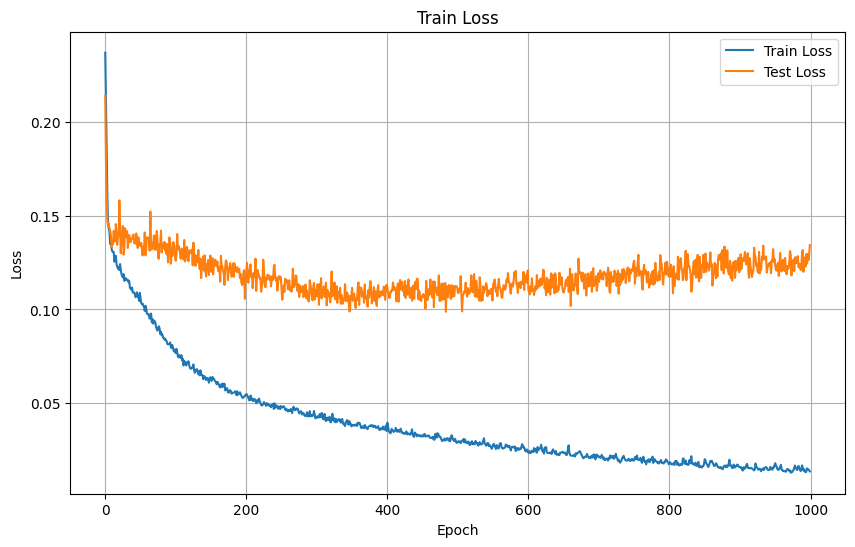

In [5]:
nqe7 = RNNQE(n_feature=5, num_layers=7)
nqe_trainer7 = trainer(nqe7, train_loader, test_loader, criterion=criterion)
nqe_trainer7.train(1000, chk=True)

In [6]:
torch.save(nqe7, "../models/0304_RNNQE_layer7_loss0_13.pt")